In [67]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
from functools import reduce
from plotnine import *

## Gathering Data for this Project

### The WeRateDogs Twitter archive
- manually downloaded
- stored as `twitter-archive-enhanced.csv`

In [3]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

### The tweet image predictions
- what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network 
- file (image_predictions.tsv) should be downloaded programmatically (using `Requests library`)
- URL: `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

images = pd.read_csv('image-predictions.tsv', sep='\t')

### retweet count and favorite ("like") count 
- *optional*: any additional data you find interesting 
- query the Twitter API for each tweet's JSON data using Python's `Tweepy library` 
- store each tweet's entire set of JSON data in a file called `tweet_json.txt` file 
- Each tweet's JSON data should be written to its own line 
- read this .txt file line by line into a pandas DataFrame with (at minimum) `tweet ID`, `retweet count`, and `favorite count`

In [4]:
consumer_key = 'XYZ'
consumer_secret = 'XYZ'
access_token = 'XYZ'
access_secret = 'XYZ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
tweet_ids = archive.tweet_id.values

In [6]:
json_list = []
errors = []

for tweet_id in tweet_ids:
    try:
        tweet_json = api.get_status(tweet_id, tweet_mode='extended')._json
        json_list.append(tweet_json)
    except Exception as e:
        errors.append((tweet_id, e))

Rate limit reached. Sleeping for: 451
Rate limit reached. Sleeping for: 525


In [12]:
with open('tweet_json.txt', 'w') as file:
    for item in json_list:
        file.write(json.dumps(item) + '\n')

In [5]:
tweets = pd.read_json('tweet_json.txt', lines=True)
tweets = tweets[['id', 'favorite_count', 'retweet_count']]

## Assessing data

*detect and document at least eight (8) quality issues and two (2) tidiness issues*

**Key Points:**
- only original ratings (no retweets) that have images
- Cleaning includes merging individual pieces of data according to the rules of tidy data
- The fact that the rating numerators are greater than the denominators does not need to be cleaned
- You do not need to gather the tweets beyond August 1st, 2017

In [6]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [9]:
archive[['doggo', 'floofer', 'pupper', 'puppo']].head(20)

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


In [10]:
archive.loc[archive.rating_denominator != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [11]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
an             7
Bailey         7
Buddy          7
Toby           7
Jax            6
Leo            6
Bella          6
Jack           6
Rusty          6
Stanley        6
Koda           6
Scout          6
Oscar          6
Milo           6
Dave           6
Bentley        5
            ... 
Ben            1
Kane           1
Bradley        1
Berb           1
Jazz           1
Glacier        1
Jangle         1
Goose          1
Gordon         1
Georgie        1
Jaycob         1
Beckham        1
Willow         1
Brockly        1
JD             1
Ricky          1
Sweet          1
Mairi          1
Adele          1
Glenn          1
Chuq           1
Marlee         1
Herb           1
Enchilada      1
Buckley        1
Tango          1
Lipton         1
Spencer       

In [12]:
images.p1.value_counts().head(20)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Name: p1, dtype: int64

### Assessment findings:
`archive`:
#### Tidiness:
- dog-stage should be a variable (*doggo, floofer, pupper, puppo*)
- `nominator`and `denominator`should be one variable
- columns for retweets are useless after removing retweeted rows

#### Quality: 
- `twitter_id`s are `int` instead of `string`
- Erroneous datatypes for timestamp
- Erroneous datatypes for dog-stage
- some ratings don't have a related image
- data includes rows from retweets
- wrong ratings
- wrong and missing names
- data in `source` is HTML code

`images`:
#### Tidiness:
- table should be part of `archive`

#### Quality:
- `twitter_id` is `int` instead of `string`

`tweets`:
- should be part of `archive`

## Cleaning Data for this Project

- Clean the  documented issues
- The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate)
- the issues that satisfy the Project Motivation must be cleaned

In [13]:
archive_clean=archive.copy()
images_clean=images.copy()
tweets_clean=tweets.copy()

### 1. `images` and `tweets` should be part of `archive` / datatype of `tweet_id`
#### Define:

- transform `tweet_id`s in `str`
- set `tweet_id`as index
- join `images` and `tweets` dataframes

#### Code:

In [14]:
tweets_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

tables = [archive_clean, images_clean, tweets_clean]
for table in tables:
    table.tweet_id = table.tweet_id.astype(str)
    table.set_index('tweet_id', inplace=True)

df_clean = archive_clean.join([images_clean, tweets_clean], how = 'inner')

#### Test:

In [15]:
df_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [16]:
type(df_clean.index[0])

str

### 2. data includes rows from retweets and without images
#### Define: 

- filter dataframe for original posts with images

#### Code:

In [17]:
df_clean = df_clean.loc[
    (df_clean.retweeted_status_user_id.isnull()) &
    (df_clean.in_reply_to_user_id.isnull()) &
    (~df_clean.jpg_url.isnull())
]

#### Test:

In [18]:
df_clean[['retweeted_status_user_id', 'in_reply_to_user_id', 'jpg_url']].isnull().sum()

retweeted_status_user_id    1970
in_reply_to_user_id         1970
jpg_url                        0
dtype: int64

### 3. columns for retweets are useless after removing retweeted rows
#### Define:

 - remove columns:`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`
 
#### Code:

In [19]:
df_clean.drop(
    ['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 
     'retweeted_status_user_id','retweeted_status_timestamp'], 
    axis=1, inplace=True)

#### Test:

In [20]:
df_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

### 4. dog-stage should be a variable (doggo, floofer, pupper, puppo)
#### Define:

- melt doggo, floofer, pupper, puppo columns to dog-stage variable
- drop columns doggo, floofer, pupper, puppo
- transform dog-stage values to category type

#### Code:

In [21]:
# gather dog_stage in one column
dog_stage = pd.melt(df_clean.reset_index()[['tweet_id', 'doggo', 'floofer','pupper', 'puppo']],
        id_vars= ['tweet_id'],
        value_vars= ['doggo', 'floofer','pupper', 'puppo'],
        value_name= 'dog_stage')
# group by tweet_id and extract dog_stage for this tweet if available
dog_stage = (dog_stage
             .groupby('tweet_id')
             .sum()
             .dog_stage
             .str.extract('(?P<dog_stage>(doggo)|(floofer)|(pupper)|(puppo))')['dog_stage']
            )
# join extracted dog_stage with dataframe
df_clean = df_clean.join(dog_stage, on='tweet_id')
# drop columns 'doggo', 'floofer','pupper', 'puppo'
df_clean.drop(['doggo', 'floofer','pupper', 'puppo'], axis=1, inplace=True)
# transform column values into categories
df_clean.dog_stage= df_clean.dog_stage.astype('category')

#### Test:

In [22]:
df_clean.dog_stage.value_counts()

pupper     201
doggo       73
puppo       22
floofer      7
Name: dog_stage, dtype: int64

In [23]:
df_clean.dtypes

timestamp               object
source                  object
text                    object
expanded_urls           object
rating_numerator         int64
rating_denominator       int64
name                    object
jpg_url                 object
img_num                  int64
p1                      object
p1_conf                float64
p1_dog                    bool
p2                      object
p2_conf                float64
p2_dog                    bool
p3                      object
p3_conf                float64
p3_dog                    bool
favorite_count           int64
retweet_count            int64
dog_stage             category
dtype: object

### 5. Wrong names and ratings / nominator and denominator should be one variable
#### Define: 

- extract `name`, `nominator`, `denominator` from tweet `text`
- normalize ratings to denominator of 10
- group results in one column
- join resulting column with clean dataframe

#### Code:

In [24]:
names_raw = df_clean.text.str.extract(r"This\sis\s([A-Z][a-z]*)[.]|Meet\s([A-Z][a-z]*)[.]|Say\shello\sto\s([A-Z][a-z]*)[.]")
new_names = names_raw.stack().reset_index().drop('level_1', axis=1).set_index('tweet_id')
new_names.columns = ['name']

In [25]:
ratings_raw = df_clean.text.str.extract(r"(?P<nominator>\d+(\.\d+)?)[/](?P<denominator>[1-9]*0)").fillna(0)
ratings_raw['rating_normalized'] = ratings_raw['nominator'].astype(float) / ratings_raw['denominator'].astype(int) * 10
ratings = ratings_raw['rating_normalized']

In [26]:
df_clean.drop(['name', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)
df_clean = df_clean.join([new_names, ratings])

#### Test:

In [27]:
df_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count', 'dog_stage', 'name',
       'rating_normalized'],
      dtype='object')

In [28]:
df_clean.name.value_counts()

Charlie      10
Cooper       10
Lucy          9
Tucker        9
Oliver        9
Winston       8
Penny         8
Toby          7
Lola          7
Daisy         7
Koda          6
Bella         6
Stanley       6
Sadie         6
Leo           5
Bailey        5
Jax           5
Louis         5
Buddy         5
Bo            5
Rusty         5
Scout         5
Oscar         4
Chip          4
Alfie         4
Chester       4
Duke          4
Finn          4
Larry         4
Phil          4
             ..
Lipton        1
Spencer       1
Freddery      1
Glenn         1
Lilly         1
Goose         1
Brockly       1
Beckham       1
Severus       1
Jaycob        1
Halo          1
Daniel        1
Mike          1
Walker        1
Erik          1
Hubertson     1
Biden         1
Lolo          1
Benny         1
Wesley        1
Derby         1
Jareld        1
Shelby        1
Dotsy         1
Dwight        1
Chaz          1
Ralphus       1
Georgie       1
Ken           1
Happy         1
Name: name, Length: 849,

In [29]:
df_clean.rating_normalized.value_counts()

12.00      449
10.00      420
11.00      397
13.00      253
9.00       151
8.00        95
7.00        51
14.00       34
5.00        32
6.00        32
3.00        19
4.00        15
2.00        10
1.00         4
1776.00      1
9.75         1
0.00         1
13.50        1
11.26        1
11.27        1
420.00       1
Name: rating_normalized, dtype: int64

### 6. Erroneous datatypes for timestamp
#### Define: 

- transform `timestamp` to datetime format

#### Code:

In [30]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

#### Test:

In [31]:
df_clean.dtypes

timestamp            datetime64[ns]
source                       object
text                         object
expanded_urls                object
jpg_url                      object
img_num                       int64
p1                           object
p1_conf                     float64
p1_dog                         bool
p2                           object
p2_conf                     float64
p2_dog                         bool
p3                           object
p3_conf                     float64
p3_dog                         bool
favorite_count                int64
retweet_count                 int64
dog_stage                  category
name                         object
rating_normalized           float64
dtype: object

### 7. data in `source` is HTML code
#### Define:

- extract source from code blocks
- transform extracts to categorical type

#### Code:

In [32]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1931
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
sources = df_clean.source.str.extract(r"(rel=\"nofollow\">(?P<source>\w+\s?\w+\s?\w+)<\/a>)")
df_clean.drop('source', axis=1, inplace=True)
df_clean = df_clean.join(sources['source'])

df_clean.source = df_clean.source.astype('category')

#### Test:

In [34]:
df_clean.source.value_counts()

Twitter for iPhone    1931
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [35]:
df_clean.dtypes

timestamp            datetime64[ns]
text                         object
expanded_urls                object
jpg_url                      object
img_num                       int64
p1                           object
p1_conf                     float64
p1_dog                         bool
p2                           object
p2_conf                     float64
p2_dog                         bool
p3                           object
p3_conf                     float64
p3_dog                         bool
favorite_count                int64
retweet_count                 int64
dog_stage                  category
name                         object
rating_normalized           float64
source                     category
dtype: object

## Storing, Analyzing, and Visualizing Data for this Project

- Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv` 
- If additional files exist because multiple tables are required for tidiness, name these files appropriately 
- Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

**Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.**

### Store dataframe

In [36]:
# store dataframe in twitter_archive_master.csv
df_clean.to_csv('twitter_archive_master.csv')

### Analyze data

#### 1. Favorite dog breed along twitter followers:

In [74]:
# find top10 dog breeds in tier1 image predictions
top_breeds = list(df_clean.loc[df_clean.p1_dog == True].p1.value_counts().head(10).keys())
# filter data for plot to only include top10 breeds
data_p1 = df_clean.loc[df_clean.p1.isin(top_breeds)].groupby('p1').favorite_count.mean().reset_index()

p1 = (
    ggplot(aes(x = 'p1', y = 'favorite_count'), data = data_p1) +
        geom_bar(stat= 'identity') +
        theme(axis_text_x=element_text(rotation=90, hjust=1)) +
        ggtitle('mean favorite count of top10 breed predictions') +
        xlab('dog breed') +
        ylab('mean favorite count')
     )

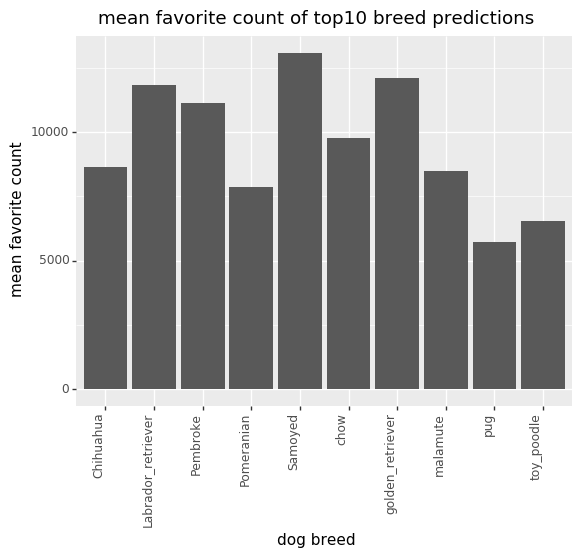

<ggplot: (139486065612)>


In [75]:
print(p1)

#### 2. best `dog_stage`:

In [77]:
# remove outliers from data for plot
data_p2 = df_clean.loc[df_clean.rating_normalized < 20]

p2 = (
    ggplot(aes(x = 'dog_stage', y= 'rating_normalized'), data_p2) +
        geom_boxplot() +
        ggtitle("Average ratings per dog stage") +
        xlab('dog stage') +
        ylab('normalized rating')
)

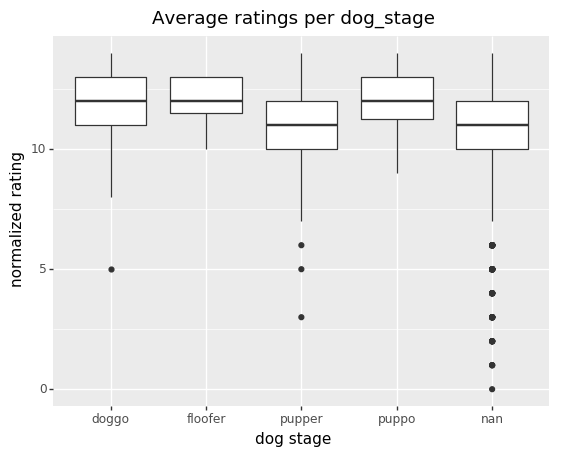

<ggplot: (139485989026)>


In [69]:
print(p2)

#### 3. relation between `normalized rating` and `favorite count`:

In [87]:
# we use the same data as in p2
p3 = (
    ggplot(aes(x= 'favorite_count', y = 'rating_normalized'), data = data_p2) +
        geom_point(alpha = 0.1) +
        geom_smooth(color= 'grey', alpha= 0.5)
)

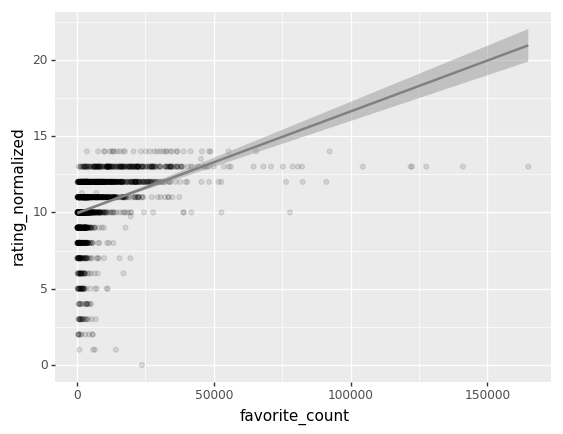

<ggplot: (-9223371897368706991)>


In [88]:
print(p3)

## Reporting for this Project

- Create a 300-600 word report called `wrangle_report.pdf` or `wrangle_report.html` that briefly describes your wrangling efforts
- This is to be framed as an internal document

- Create a 250-word-minimum report called `act_report.pdf` or `act_report.html` that communicates the insights and displays the visualization(s) produced from your wrangled data 
- This is to be framed as an external document, like a blog post or magazine article, for example